<a href="https://colab.research.google.com/github/Epsita-R/AML/blob/main/AML_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
Mental_disorders_path = '/content/AML_project.xlsx'
df = pd.read_excel(Mental_disorders_path)

In [ ]:
df.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anexiety


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ag+1:629e                    637 non-null    int64 
 1   feeling.nervous              637 non-null    int64 
 2   panic                        637 non-null    int64 
 3   breathing.rapidly            637 non-null    int64 
 4   sweating                     637 non-null    int64 
 5   trouble.in.concentration     637 non-null    int64 
 6   having.trouble.in.sleeping   637 non-null    int64 
 7   having.trouble.with.work     637 non-null    int64 
 8   hopelessness                 637 non-null    int64 
 9   anger                        637 non-null    int64 
 10  over.react                   637 non-null    int64 
 11  change.in.eating             637 non-null    int64 
 12  suicidal.thought             637 non-null    int64 
 13  feeling.tired                637 no

In [ ]:
df = df.rename(columns={'ag+1:629e':'age'})
df = df.rename(columns={'having.trouble.in.sleeping':'trouble.sleeping'})
df = df.rename(columns={'having.trouble.with.work':'trouble.with.work'})
df = df.rename(columns={'having.nightmares':'nightmares'})

df.set_index(['age'])

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,over.react,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
age,,,,,,,,,,,,,,,,,,,,,
23,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,MDD
14,1,0,1,0,0,1,0,0,1,1,...,1,1,0,0,0,0,1,0,0,ASD
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
29,1,0,0,0,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,bipolar
32,1,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,anexiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,eating disorder
27,1,0,1,0,0,0,0,1,1,0,...,1,0,1,1,1,0,0,0,0,PDD
19,0,1,0,0,1,0,1,0,0,1,...,0,1,0,1,0,0,1,0,1,ASD


Some preliminary data visualisation and analysis

<Axes: xlabel='age', ylabel='Count'>

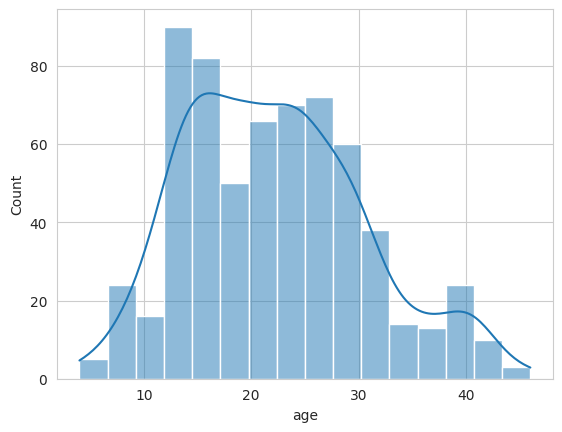

In [ ]:
# Histogram of Age Profile
sns.histplot(df.age, kde=True)

Looks like an amalgamation of a few distributions, with onset of MH problems occurring in youth, late 20s and 40s.

In [ ]:
# Look for incidences of the various symptoms
symptom_incidences = df[df.columns[1:27]].sum()

<Axes: title={'center': 'Incidences of Various Mental Health Symptoms'}>

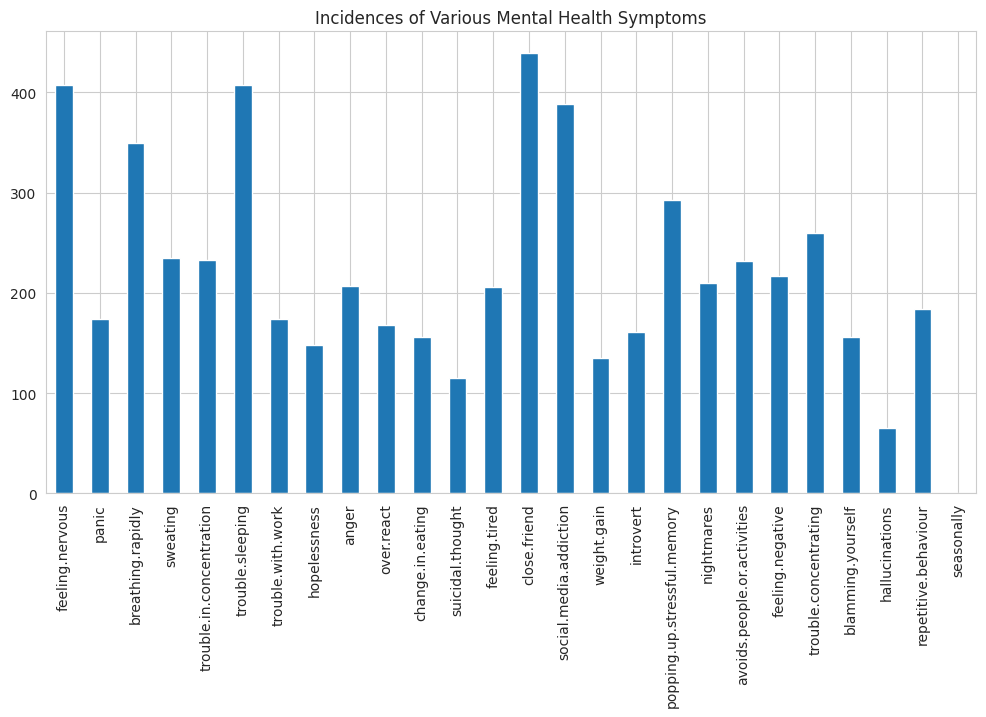

In [ ]:
symptom_incidences.plot.bar(figsize=(12,6), title = 'Incidences of Various Mental Health Symptoms')

In [ ]:
# Get list of unique disorders
Disorders = df.Disorder.unique()
Disorders
# Note that this is reset later, to be given in the order used by the model

array(['MDD', 'ASD', 'Loneliness', 'bipolar', 'anexiety', 'PTSD',
       'sleeping disorder', 'psychotic deprission', 'eating disorder',
       'ADHD', 'PDD', 'OCD'], dtype=object)

In [ ]:
# Correct spelling mistakes
df.Disorder = df.Disorder.str.replace('psychotic deprission', 'psychotic depression')
df.Disorder = df.Disorder.str.replace('anexiety','anxiety')

In [ ]:
symptoms = list(df.columns) # Likely to be useful later
symptoms.remove('age')

<Axes: >

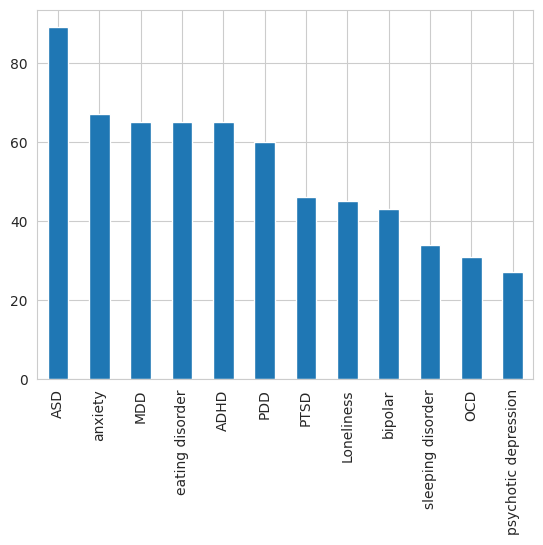

In [ ]:
# Sum the total incidences of each diagnosed disorder.
incidences = df.Disorder.value_counts()
incidences.plot.bar()
# This assumes that each person has only one diagnosed disorder, and appears only once in the dataset.
# Secondary diagnoses - which are common - are ignored

In [ ]:
# Look for NaN values:
df[df.isna().any(axis=1)]
# None found

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder


In [ ]:
# Look for any symptom incidence values that are neither 0 or 1
errors = df[(df.iloc[:,1:27] > 1).any(axis=1)]
errors
# None found

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder


In [ ]:
# Reminder before ML starts
df

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anxiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,23,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,eating disorder
633,27,1,0,1,0,0,0,0,1,1,...,1,0,1,1,1,0,0,0,0,PDD
634,19,0,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,1,ASD
635,16,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Disorder'], axis=1)

In [ ]:
y = pd.get_dummies(df['Disorder'])

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=0)
my_model = DecisionTreeRegressor()
my_model.fit(train_X, train_y)

In [ ]:
val_predictions = my_model.predict(val_X)
print(mean_absolute_error(val_y,val_predictions))

In [ ]:
val_y

In [ ]:
Disorders = list(val_y.columns)

In [ ]:
val_y_index = list(val_y.index)
# val_y_index
# Will want this later to keep the entries in order

In [ ]:
val_predictions

In [ ]:
# Frustratingly, the DecisonTreeRegressor returns an array of floating point numbers. Convert back to DataFrame of integers
results = pd.DataFrame(val_predictions, columns=Disorders)
for columns in results:
    results = results.astype({columns:'int'})
results

In [ ]:
# Checking again for errors in returned results.  No errors found.
errors = results[(results.iloc[:,:] > 1).any(axis=1)]
errors

In [ ]:
# Look to see if some rows have '0s' in every column, i.e. the results of the decision tree model were inconclusive.
# Need to catch these into another column.
Inconclusive = (results == 0).astype(int).sum(axis=1)

In [ ]:
# Reset this new variable 'Inconclusive' to 0 or 1, instead of 11 or 12
for n in range(len(Inconclusive)):
    if Inconclusive[n] == 12:
        Inconclusive[n] = 1
    else:
        Inconclusive[n] = 0
# Inconclusive

In [ ]:
# Add in the Inconclusive results column and show occurrances
results['Inconclusive'] = Inconclusive
results[results['Inconclusive'] == 1]

In [ ]:
# Convert results dataFrame back to list of diagnoses, including option for Inconclusive result
results = pd.from_dummies(results)
#results

In [ ]:
# Look to see if some rows have '0s' in every column, i.e. the Original data was inconclusive.
# Need to catch these into another column.
Inconclusive_original = (val_y == 0).astype(int).sum(axis=1)
if Inconclusive_original.sum() == len(Inconclusive_original)*11:
    print('No Inconclusive diagnoses in original data')

In [ ]:
# Convert val_y back to original column
val_y = pd.from_dummies(val_y)
val_y['Index'] = val_y_index
val_y.set_index('Index')
val_y

In [ ]:
# Pull both original validation data and results into same df for easy comparison
comparison = pd.concat([val_y , results], axis=1)
comparison

In [ ]:
# Run a loop to count and display prediction errors
n_errors = 0
for n in range(159):
    if comparison.iloc[n,0] != comparison.iloc[n,2]:
        print('Error in prediction. Original diagnosis:', comparison.iloc[n,0],'  Model prediction:',comparison.iloc[n,2])
        n_errors +=1
print('The total number of diagnosis errors were: ', n_errors)

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score

# Assuming 'df' is your DataFrame containing the dataset
# Make sure the 'Disorder' column is categorical
df['Disorder'] = pd.Categorical(df['Disorder'])
df['Disorder_code'] = df['Disorder'].cat.codes

# Separate features (X) and target variable (y)
X = df.drop(['Disorder', 'Disorder_code'], axis=1)
y = df['Disorder_code']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
model = SVC(kernel='linear')  # You can try different kernels like 'rbf', 'poly', etc.

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Display classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Function to get user input and make predictions
def get_user_input():
    print("Provide input for the features (T/F):")
    user_input = {}
    for column in X.columns:
        user_input[column] = input(f"{column}: ").upper() == 'T'
    return user_input

# Get user input
user_input_data = get_user_input()

# Create a DataFrame from user input
user_input_df = pd.DataFrame([user_input_data])

# Make prediction
user_prediction = model.predict(user_input_df)[0]

# Convert the predicted code back to the original disorder label
predicted_disorder = df['Disorder'].cat.categories[user_prediction]

# Display the result
print(f"\nPredicted Disorder: {predicted_disorder}")

Provide input for the features (T/F):


KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score

# Assuming 'df' is your DataFrame containing the dataset
# Make sure the 'Disorder' column is categorical
df['Disorder'] = pd.Categorical(df['Disorder'])
df['Disorder_code'] = df['Disorder'].cat.codes

# Separate features (X) and target variable (y)
X = df.drop(['Disorder', 'Disorder_code'], axis=1)
y = df['Disorder_code']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Function to get user input and make predictions
def get_user_input():
    print("Provide input for the features (T/F):")
    user_input = {}
    for column in X.columns:
        user_input[column] = input(f"{column}: ").upper() == 'T'
    return user_input

# Get user input
user_input_data = get_user_input()

# Create a DataFrame from user input
user_input_df = pd.DataFrame([user_input_data])

# Make prediction
user_prediction = model.predict(user_input_df)[0]

# Convert the predicted code back to the original disorder label
predicted_disorder = df['Disorder'].cat.categories[user_prediction]

# Display the result
print(f"\nPredicted Disorder: {predicted_disorder}")


Provide input for the features (T/F):
age: 21
feeling.nervous: T
panic: F
breathing.rapidly: F
sweating: F
trouble.in.concentration: T
trouble.sleeping: F
trouble.with.work: T
hopelessness: F
anger: F
over.react: T
change.in.eating: F
suicidal.thought: T
feeling.tired: T
close.friend: F
social.media.addiction: T
weight.gain: F
introvert: T
popping.up.stressful.memory: F
nightmares: F
avoids.people.or.activities: T
feeling.negative: F
trouble.concentrating: T
blamming.yourself: F
hallucinations: F
repetitive.behaviour: F
seasonally: T
increased.energy: F

Predicted Disorder: ASD


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score

# Assuming 'df' is your DataFrame containing the dataset
# Make sure the 'Disorder' column is categorical
df['Disorder'] = pd.Categorical(df['Disorder'])
df['Disorder_code'] = df['Disorder'].cat.codes

# Separate features (X) and target variable (y)
X = df.drop(['Disorder', 'Disorder_code'], axis=1)
y = df['Disorder_code']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate prediction errors
prediction_errors = (y_pred != y_test).sum()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Display classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Display prediction errors
print(f"Prediction Errors: {prediction_errors}")


Accuracy: 1.0
Precision: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         4

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128

Prediction Errors: 0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Assuming 'df' is your DataFrame containing the dataset
# Make sure the 'Disorder' column is categorical
df['Disorder'] = pd.Categorical(df['Disorder'])
df['Disorder_code'] = df['Disorder'].cat.codes

# Separate features (X) and target variable (y)
X = df.drop(['Disorder', 'Disorder_code'], axis=1)
y = df['Disorder_code']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Perceptron model
model = Perceptron()

# Train the model
model.fit(X_train, y_train)

# Function to get user input and make predictions
def get_user_input():
    print("Provide input for the features (T/F):")
    user_input = {}
    for column in X.columns:
        user_input[column] = input(f"{column}: ").upper() == 'T'
    return user_input

# Get user input
user_input_data = get_user_input()

# Create a DataFrame from user input
user_input_df = pd.DataFrame([user_input_data])

# Make prediction
user_prediction = model.predict(user_input_df)

# Calculate accuracy and precision on the entire test set
y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')  # 'weighted' accounts for class imbalance

# Display the result
print(f"\nPredicted Disorder: {df['Disorder'].cat.categories[user_prediction[0]]}")
print(f"Accuracy on Test Set: {accuracy_test}")
print(f"Precision on Test Set: {precision_test}")

Provide input for the features (T/F):
age: 21
feeling.nervous: T
panic: F
breathing.rapidly: F
sweating: F
trouble.in.concentration: F
trouble.sleeping: F
trouble.with.work: F
hopelessness: F
anger: T
over.react: F
change.in.eating: T
suicidal.thought: F
feeling.tired: T
close.friend: F
social.media.addiction: T
weight.gain: F
introvert: F
popping.up.stressful.memory: F
nightmares: F
avoids.people.or.activities: F
feeling.negative: F
trouble.concentrating: F
blamming.yourself: F
hallucinations: F
repetitive.behaviour: F
seasonally: F
increased.energy: T

Predicted Disorder: OCD
Accuracy on Test Set: 0.9296875
Precision on Test Set: 0.961328125
